# CSCI4022 Homework 1; Review

## Due Friday, January 28 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Problem 1 (Numerics... kind of; 11 points)
***
####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.



####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?


## Problem 2 (Visualizations and Dimension Reduction; 17 points)
***


The Zeiss Xradia x-ray microscope (XRM) that lives in the basement of engineering is a pretty cool device that forms 3-dimensional reconstructions of scanned objects by bombaring them with light and recording the resulting intensity/light interference of the resulting object.  As one stage in processing, each object is reduced into a large number of "voxels" and their resulting intensities.  In this problem we take a reduced set of data of this form and convert the "voxels" into point locations (in micrometers) and visualize the results.

The University of Colorado Museum of Natural History is currently using the XRM to catalogue and save some of their artifacts, as well as allow for the possibility of 3-D digital printings and reconstructions.  We've been given access to some of their data!

The following should load in the data, make it an `np.array` instead of a data frame, and create a **projection**, where data from one dimension is entirely exluded.  In this case, we're taking all of the "Z" values that were in third column of `mat` and "projecting" them onto the X-Y plane for a nice and easy-to-see scatter plot.

Clearly these aren't random points, but what **is** this thing?

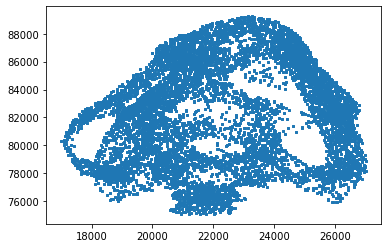

In [2]:
dat=pd.read_csv('../data/xrm_10k.csv', encoding='UTF-8')
mat=np.array(dat[['X','Y','Z']])
plt.scatter(mat[:,0],mat[:,1], 5, marker=',')

**Part A**:  Create scatter plot projections of the given point cloud onto the other two cartesian axis (the XZ and YZ planes).

**Part B**:  It's a little silly to be constrained by the orientation of the object in the XRM itself, since there's no concrete meaning to the X, Y, and Z of the object.  We might ask ourselves if there's a way to re-orient the object and view it form an angle that makes it more clear what it is.

To this end we can employ a **rotation matrix**, code for which is given below.  It uses the aeronautical terms associated with aircraft, which can be hard to understand for a lay person.  Create a small visualization using scatter plots that you believe demonstrate the exact effects of *pitch*, *yaw*, and *roll*.  See also: [wiki](https://en.wikipedia.org/wiki/Aircraft_principal_axes).

**Hint:** You're free to take your own approach here, but I recommend picking one of the 3 projections and then applying a small "rotation" of e.g. 0 pitch, 0 roll, and 30 degree yaw (**What's that in radians?**).  The side-by-side plots of before and after the rotation might show what yaw is, with an accompanying sentence.

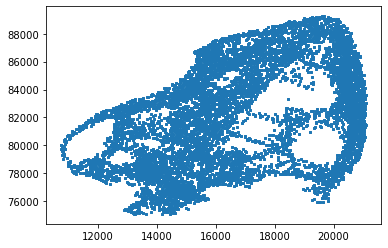

In [3]:
def rotate(mat, yaw, pitch, roll):
    r_mat=[[np.cos(yaw)*np.cos(pitch), \
            np.cos(yaw)*np.sin(pitch)*np.sin(roll)- np.sin(yaw)*np.cos(roll),\
            np.cos(yaw)*np.sin(pitch)*np.cos(roll)+np.sin(yaw)*np.sin(roll) ],\
           [np.sin(yaw)*np.cos(pitch), \
            np.sin(yaw)*np.sin(pitch)*np.sin(roll)+ np.cos(yaw)*np.cos(roll),\
            np.sin(yaw)*np.sin(pitch)*np.cos(roll)-np.cos(yaw)*np.sin(roll) ],\
           [-np.sin(pitch), \
            np.cos(pitch)*np.sin(roll),\
            np.cos(pitch)*np.cos(roll)]
          ]
    return np.matmul(mat, r_mat)

rotated=rotate(mat, 0, 30*np.pi/180, 0)
plt.scatter(rotated[:,0],rotated[:,1], 5, marker=',')

**Part C**:  A common goal in Data Science might be to come up with the "best" rotation out of all the possible ways.  To this end we will perform the following exercise:

1) Consider rotations where pitch, yaw, and roll are all values taken from the list [0, 30, 60, 90, 120, 150].  For **all $6^3$ such rotations**, create a rotated data set and project it onto the X-Y plane (columns 0 and 1).  You don't need to plot this projection.  Instead, compute some statistics from it.

2) For each data set in 1), find the ones with the following properties, and plot their post-rotation X-Y projections:

    A) The data set with the smallest minimum-area rectangle necessary to fit the entire object on the XY plane.
    B) The data set with the largest minimum-area rectangle necessary to fit the entire object on the XY plane.
    C) The data set with the largest difference between it's x-dimension range and y-dimension length.
    
Each of the calculations in 2 should be manageable predominantly with calls to `np.min` and `np.max`.

**Part D**: Can you tell what the object actually is?  Are the measures in **Part C** actually good choices of "best" projections, or can you think of some others?  You may describe the features that you think make for a good projection in words.


## Problem 3 (Hypothesis Simulation; 17 points)
***
One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

Suppose our goal is to outperform a very naive self-driving vehicle. This vehicle is so simple that its motion is entirely random!  The goal is for both our self-driving "car" and the comparison "random" car is to make it from the starting location in the bottom left in Cartesian coordiantes (0,0) and make it to the end goal at (5,2).

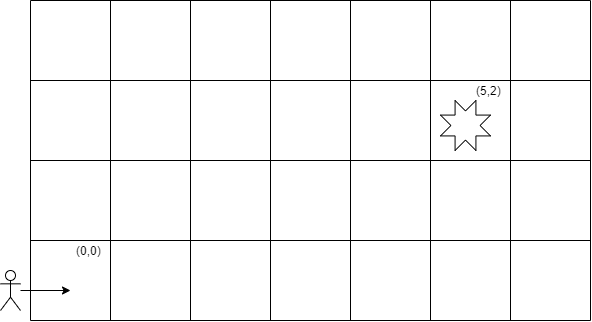

Movement for the "random" car occurs under the following rules:
- Each time step, the car will attempt to choose a direction to move out of (up, down, left, right)
- It will choose to move the **same** direction as its prior motion exactly 50% of the time
- It will choose to turn left or right exactly 25% of the time, each.
- If a movement chosen would result in it leaving the 7x4 region shown, it will choose again from the same options and probabilities until a valid movement is chosen.

The car is done moving as soon as it enters the square at (5,2).  It starts at (0,0), and moves as though its prior move was to the right.

**Part A**: Needless to say, this car isn't very smart.  Simulate 10,000 "journies" of this randomly moving car, saving both how many movements were required to reach (5,2). You may use any syntax/API you want, but one option is loosely outlines below.

In [4]:
#mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=E.  Makes for a nice way to estimate probs.
cartesian_directions=np.array([(0,1), (1,0), (0,-1), (-1,0)])

def move(location, previous_direction):
    #stuff
    return new_direction, new_location

def journey(initial_location, initial_direction, goal_location):
    #stuff
    return movements


**Part B**: Create a density histogram of the number of movements.  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

**Part C**: You and your team design a new car, and thankfully it uses a **different** algorithm to determine how and where to move.  Unfortunately, you don't get a sample size of 10,000 samples from your car, since it actually drives on a small track.  You drive it on a similar grid to the above 10 times, and find that over those 10 times your car averaged 16 moves, and also had a median of 17 moves.  Is this demonstrably better than the car you simulated in parts **A** and **B**?  Answer with the following prompts:

**C1**: What is your estimated probability that a single trip of the "random" car takes 16 moves or less?

**C2**: What would you estimate the probability to be that an **average** number of movements over 10 trips is 16 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that my car of the same quality as the random car if a set of 10 trials has an average number of movements less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .04 or less?

**C4**: Would your results in parts **C1**-**C3** change it all if we compared the *medians* instead of the *means* of your car versus the "random" car?

**C5**: What can you safely (with statistical rigor!) tell people about your new car?